# Titanic Exploratory Data analysis Project

## Step 1: Import Libraries

In [74]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Step 2: Load Data

In [75]:
# Load the Titanic dataset
data = pd.read_csv('./data/train.csv')

In [76]:
# Display the first few rows
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [77]:
# Display the last few rows
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
888,889,0.0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1.0,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0.0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q
891,892,NaN,3,"Zaman, Mr. Hasan",Male,42.0,0,2,36278,8.25,NaN,S
892,893,NaN,3,"Maahi, Mrs. Faria",Female,14.0,0,1,36279,5.25,NaN,Q


## Step 3: Initial Data Exploration

In [78]:
# Check the shape of the data
data.shape

(893, 12)

In [79]:
# Check for info about the data types and missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 893 entries, 0 to 892
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  893 non-null    int64  
 1   Survived     891 non-null    float64
 2   Pclass       893 non-null    int64  
 3   Name         893 non-null    object 
 4   Sex          893 non-null    object 
 5   Age          716 non-null    float64
 6   SibSp        893 non-null    int64  
 7   Parch        893 non-null    int64  
 8   Ticket       893 non-null    object 
 9   Fare         893 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(3), int64(4), object(5)
memory usage: 83.8+ KB


In [80]:
# Get a summary of the numerical columns
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,893.000000,891.000000,893.000000,716.000000,893.000000,893.000000,893.000000
mean,447.000000,0.383838,2.310190,29.694372,0.521837,0.384099,32.147200
std,257.931192,0.486592,0.835773,14.525328,1.101784,0.807236,49.652336
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,447.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,670.000000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,893.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [81]:
# Check for missing values
all_columns_values = data.isnull().sum()
only_missing_value = data.isnull().sum()[data.isnull().sum() > 0]
print("\nAll Columns Values:")
print(all_columns_values)
print("\nOnly Missing Values:")
print(only_missing_value)


All Columns Values:
PassengerId      0
Survived         2
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          689
Embarked         2
dtype: int64

Only Missing Values:
Survived      2
Age         177
Cabin       689
Embarked      2
dtype: int64


## Step 4: Data Cleaning

### Handle Missing Values
##### We are only item 4 that have null values, we can handle then step by step

In [82]:
# Fill missing values in 'Age' with the median
data["Age"] = data["Age"].fillna(data["Age"].median())

In [83]:
# Check again the missing value; We can see age don't have missing value anymore
only_missing_value = data.isnull().sum()[data.isnull().sum() > 0]
print(only_missing_value)

Survived      2
Cabin       689
Embarked      2
dtype: int64


In [84]:
# Now Handle the 'SURVIVED'. We can drop it B
data.dropna(subset=["Survived"], inplace=True)

In [85]:
# Check again the missing value, We can see 'Survived' don't have missing value anymore
only_missing_value = data.isnull().sum()[data.isnull().sum() > 0]
print(only_missing_value)

Cabin       687
Embarked      2
dtype: int64


In [86]:
# Fill missing values in 'Embarked' with the mode (the most frequent value)
data['Embarked'] = data['Embarked'].fillna(data['Embarked'].mode()[0])

In [87]:
# Check how many of them have missed 'CABIN' 
missing_cabin_pclass3 = data[data['Pclass'] == 3]['Cabin'].isnull().sum()
missing_cabin_pclass3

np.int64(479)

In [88]:
# Create a new binary feature (new column): HasCabin
# 1 if Cabin value is present, 0 if it's missing
data['HasCabin'] = data['Cabin'].notna().astype(int)

In [89]:
# Check the first few rows of the DataFrame
# Verify that the new 'HasCabin' column is added and filled with 1 (has Cabin) or 0 (missing cabin)
data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [90]:
# Now we can drop the 'Cabin' column safely
data.drop(columns=["Cabin"], inplace=True)

In [91]:
# Check the first few rows of the DataFrame for verified Cabin column is removed
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0


In [92]:
# Check again the missing value, We don't have missing value anymore
only_missing_value = data.isnull().sum()[data.isnull().sum() > 0]
print(only_missing_value)
# NO missing value

Series([], dtype: int64)


### Convert Categorical Variables to Appropriate Types 

In [93]:
# Convert 'Sex' to a binary variable (0 for male, 1 for female)
# This is called Label Encoding, where categorical data (strings) is converted to numerical values.
# Benefits: Machine learning algorithms usually work better with numerical data rather than strings.
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})


In [94]:
# Convert 'Embarked' to categorical values using Ordinal Encoding:
# 'C' -> 0, 'Q' -> 1, 'S' -> 2
# 'Embarked' represents the embarkation points, and we assign numerical values to these categories.
# Benefits: Helps algorithms understand the relationship between the categories if there’s any ordering (though no strong order in this case).
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [95]:
# Convert 'Pclass' to a categorical type to indicate it's a discrete category (1st, 2nd, 3rd class)
# Benefits: Converting to category type saves memory and tells the model that 'Pclass' should be treated as a categorical feature.
data['Pclass'] = data['Pclass'].astype('category')

In [101]:
data.dtypes

PassengerId       int64
Survived        float64
Pclass         category
Name             object
Sex               int64
Age             float64
SibSp             int64
Parch             int64
Ticket           object
Fare            float64
Embarked          int64
HasCabin          int64
dtype: object

In [102]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,HasCabin
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,2,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,0,1
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,2,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,2,1
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,2,0


## Step 5: Univariate Analysis (Summary Statistics and Visualizations)

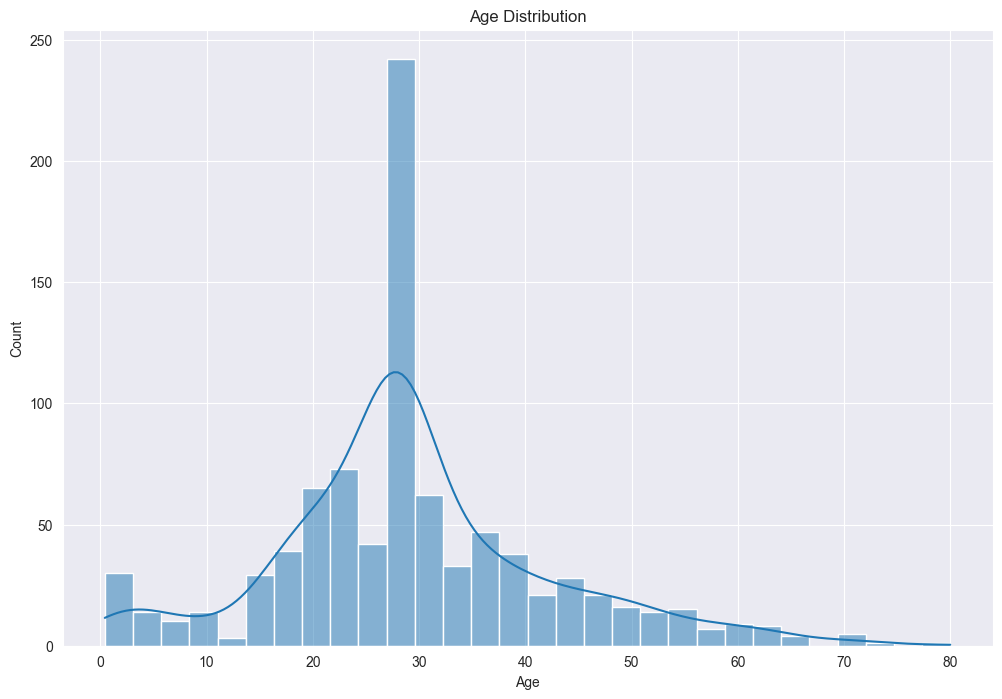

In [112]:
# Distribution of 'Age' feature
plt.figure(figsize=(12, 8))
sns.histplot(data['Age'], kde=True)
plt.title('Age Distribution')
plt.show();

# Age distribution is right-skewed, it means there are younger passengers, but the few older passengers (e.g., passengers in their 60s, 70s) cause the tail to stretch to the right.
# Right-skewed distributions are typically associated with Exponential Distribution as they all have long right tails.

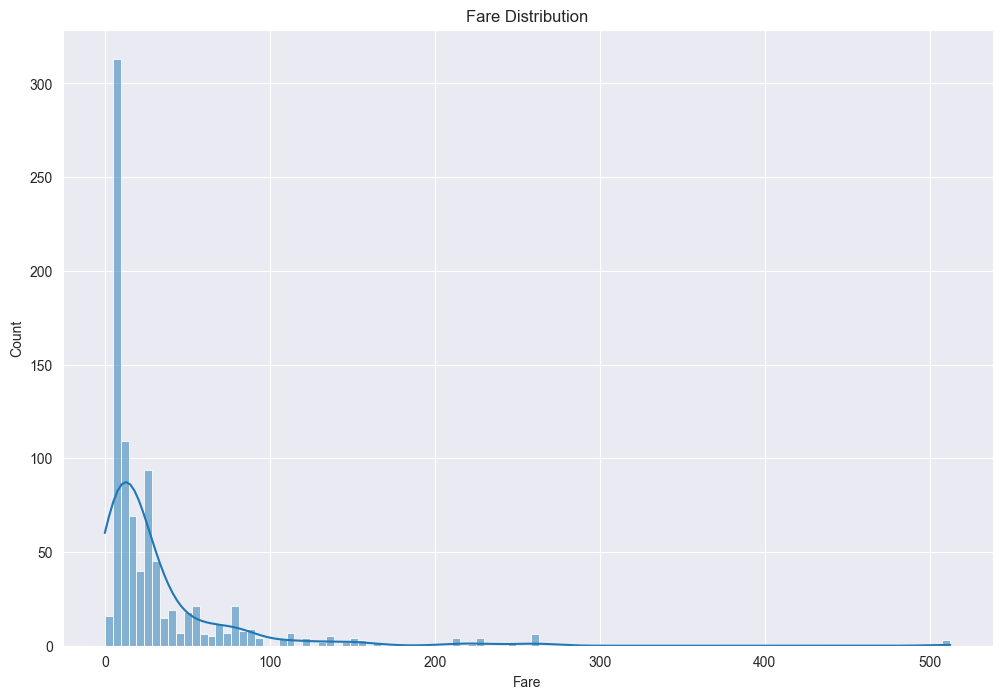

In [114]:
# Distribution of 'Fare' feature
plt.figure(figsize=(12, 8))
sns.histplot(data['Fare'], kde=True)
plt.title('Fare Distribution')
plt.show()

# Fare distribution is right-skewed, indicating that most passengers paid lower fares, with a few passengers paying much higher fares. 
# The right tail of the distribution is stretched due to a small number of high-paying passengers (typically first-class passengers). 
# This type of distribution is often associated with a **Log-Normal Distribution**, as it shows a concentration of values on the left with a long right tail.